<a href="https://colab.research.google.com/github/cml096/GoogleColabRepo/blob/master/cristobal/Data-02/Rendimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_excel('OperTot - PowerView_ARCH1.xlsx')

In [3]:
list_drop = ['ID','shiftindex','crew#','unit#','tmcat08','tmcat09','tmcat10','tmcat11','tmcat12','tmcat13','tmcat14','tmcat15','tmcat16','tmcat17','tmcat18','tmcat19']
df.drop(list_drop,axis=1,inplace=True)

In [4]:
df["shift#"] = df["shift#"].astype(str)
df.totaltons = df.totaltons.astype(int)

Selecionamos las Palas que tengan toneladas diferentes de 0


In [5]:
df_loads = df[ (df.unit == 'Pala') & (df.totaltons !=0) ]

#Rendimiento Efectivo

\begin{equation}
\mathrm{Rendimiento_{(efectivo)}}[tps] = \frac{Tonelaje}{Segundos Efectivas del Equipo}
\end{equation}

In [6]:
def rendimiento_efectivo(ton,time):
  if time == 0:
    return 0
  else:
    #if ton/time > 1.306:
    if ton/time > 10:
      print(f'toneladas = {ton} ; tiempo efectivo = {time} ; Rendimiento : {ton/time} (t/s)')
    return ton/time

In [7]:
df_loads.columns

Index(['shiftdate', 'shift#', 'start', 'crew', 'eqmtid', 'logintime', 'locid',
       'operid', 'totaltime', 'pit', 'unit', 'totalloads', 'totaltons',
       'loadtime', 'idletime', 'spottime', 'loadcnt', 'tmcat00', 'tmcat01',
       'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07'],
      dtype='object')

In [8]:
df_loads['rendimiento_efectivo'] = df_loads.apply(lambda row : rendimiento_efectivo(row.totaltons,row.tmcat01),axis=1)

toneladas = 230 ; tiempo efectivo = 12 ; Rendimiento : 19.166666666666668 (t/s)
toneladas = 228 ; tiempo efectivo = 4 ; Rendimiento : 57.0 (t/s)
toneladas = 228 ; tiempo efectivo = 19 ; Rendimiento : 12.0 (t/s)
toneladas = 7590 ; tiempo efectivo = 38 ; Rendimiento : 199.73684210526315 (t/s)
toneladas = 460 ; tiempo efectivo = 21 ; Rendimiento : 21.904761904761905 (t/s)
toneladas = 230 ; tiempo efectivo = 12 ; Rendimiento : 19.166666666666668 (t/s)
toneladas = 2530 ; tiempo efectivo = 46 ; Rendimiento : 55.0 (t/s)
toneladas = 232 ; tiempo efectivo = 13 ; Rendimiento : 17.846153846153847 (t/s)
toneladas = 228 ; tiempo efectivo = 6 ; Rendimiento : 38.0 (t/s)
toneladas = 230 ; tiempo efectivo = 7 ; Rendimiento : 32.857142857142854 (t/s)
toneladas = 3910 ; tiempo efectivo = 379 ; Rendimiento : 10.316622691292876 (t/s)
toneladas = 208 ; tiempo efectivo = 7 ; Rendimiento : 29.714285714285715 (t/s)
toneladas = 240 ; tiempo efectivo = 16 ; Rendimiento : 15.0 (t/s)
toneladas = 230 ; tiempo efect

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df_loads[['totaltons','tmcat01','rendimiento_efectivo']].describe()

,totaltons,tmcat01,rendimiento_efectivo
count,8165.000000,8165.000000,8165.000000
mean,7624.405389,12133.803919,0.675911
std,8016.192911,10519.413171,2.532134
min,44.000000,0.000000,0.000000
25%,1857.000000,3697.000000,0.422939
50%,4749.000000,9182.000000,0.571112
75%,10881.000000,17565.000000,0.778040
max,50616.000000,43200.000000,199.736842


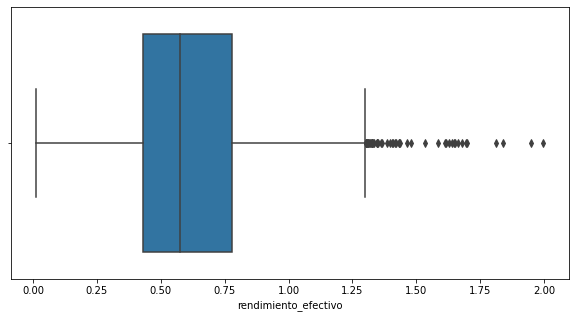

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_loads.rendimiento_efectivo[ (df_loads.rendimiento_efectivo != 0) & (df_loads.rendimiento_efectivo < 2) ])

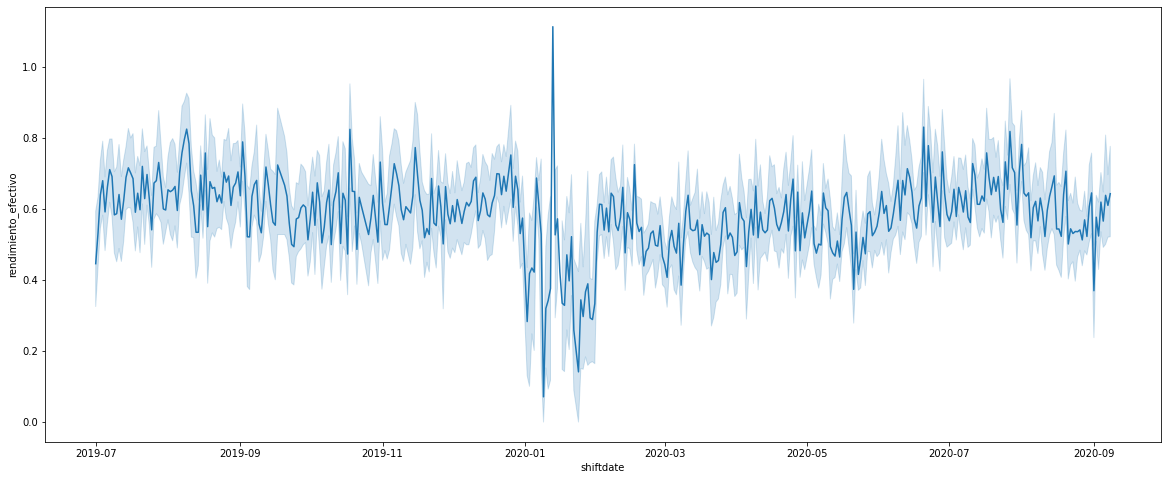

In [12]:
plt.figure(figsize=(20,8))
sns.lineplot(x="shiftdate", y="rendimiento_efectivo",data=df_loads[df_loads.rendimiento_efectivo < 2])

# Rendimiento Operativo

\begin{equation}
\mathrm{Tiempo_{(operativo)}} = \mathrm{Tiempo_{(efectivo)}} + \mathrm{Tiempo_{(no productivo)}}
\end{equation}

In [13]:
def tiempo_operativo(time_1,time_2):
  return time_1+time_2

\begin{equation}
\mathrm{Rendimiento_{(operativo)}}[tps] = \frac{Tonelaje}{Segundos Operativos del Equipo}
\end{equation}

In [14]:
def rendimiento_operativo(ton,time_1,time_2):
  time = tiempo_operativo(time_1,time_2)
  if time == 0:
    return 0
  else:
    if ton/time > 1.306:
      print(f'toneladas = {ton} ; tiempo operativo = {time} ; Rendimiento : {ton/time}')
    return ton/time

In [ ]:
df_loads['rendimiento_operativo'] = df_loads.apply(lambda row : rendimiento_operativo(row.totaltons,row.tmcat01,row.tmcat02),axis=1)

In [16]:
df_loads[['totaltons','tmcat01','tmcat02','rendimiento_operativo']].describe()

,totaltons,tmcat01,tmcat02,rendimiento_operativo
count,8165.000000,8165.000000,8165.000000,8165.000000
mean,7624.405389,12133.803919,1.175995,0.675885
std,8016.192911,10519.413171,96.835480,2.532135
min,44.000000,0.000000,0.000000,0.000000
25%,1857.000000,3697.000000,0.000000,0.422939
50%,4749.000000,9182.000000,0.000000,0.571027
75%,10881.000000,17565.000000,0.000000,0.778040
max,50616.000000,43200.000000,8704.000000,199.736842


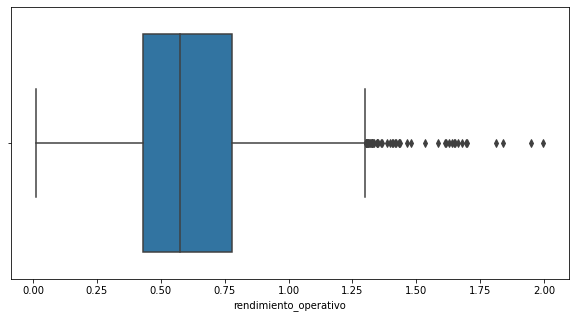

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_loads.rendimiento_operativo[ (df_loads.rendimiento_operativo != 0) & (df_loads.rendimiento_operativo < 2) ])

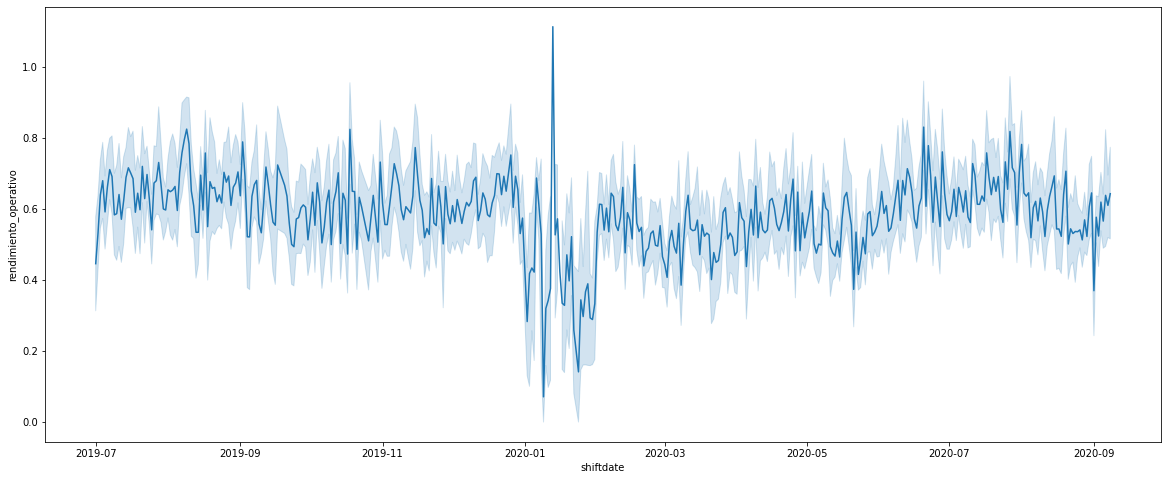

In [18]:
plt.figure(figsize=(20,8))
sns.lineplot(x="shiftdate", y="rendimiento_operativo",data=df_loads[df_loads.rendimiento_operativo < 2])

#Pomedio Palas Hidraúlicas 

In [19]:
df_palas = df_loads[df_loads.tmcat01 != 0]

\begin{equation}
Promedio nacional = 
\mathrm{0,861_{(toneladas por segundo)}}
\end{equation}

In [20]:
def check(valor):
  if valor >= 0.861:
    return 1
  else:
    return 0

In [21]:
df_palas['rend_ef_bin'] = df_palas.apply(lambda row : check(row.rendimiento_efectivo),axis=1)
df_palas['rend_op_bin'] = df_palas.apply(lambda row : check(row.rendimiento_operativo),axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
pd.DataFrame(df_palas.groupby(['rend_ef_bin']).count())

,shiftdate,shift#,start,crew,eqmtid,logintime,locid,operid,totaltime,pit,unit,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo,rendimiento_operativo,rend_op_bin
rend_ef_bin,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580
1,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443


In [23]:
pd.DataFrame(df_palas.groupby(['rend_op_bin']).count())

,shiftdate,shift#,start,crew,eqmtid,logintime,locid,operid,totaltime,pit,unit,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo,rendimiento_operativo,rend_ef_bin
rend_op_bin,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580
1,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443


In [24]:
df_palas.columns

Index(['shiftdate', 'shift#', 'start', 'crew', 'eqmtid', 'logintime', 'locid',
       'operid', 'totaltime', 'pit', 'unit', 'totalloads', 'totaltons',
       'loadtime', 'idletime', 'spottime', 'loadcnt', 'tmcat00', 'tmcat01',
       'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07',
       'rendimiento_efectivo', 'rendimiento_operativo', 'rend_ef_bin',
       'rend_op_bin'],
      dtype='object')

In [25]:
df_palas.describe()

,start,logintime,totaltime,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo,rendimiento_operativo,rend_ef_bin,rend_op_bin
count,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000
mean,8554.206656,10716.464789,15996.391499,33.548423,7732.154680,6741.483236,3726.574473,1874.526736,33.548423,15996.391499,12348.561511,1.196809,982.689892,1286.749221,214.820890,1130.125016,32.248162,0.687874,0.687848,0.179858,0.179858
std,21645.006344,12428.180068,12798.057232,34.846440,8038.944638,6108.621340,4075.983806,1984.645846,34.846440,12798.057232,10486.399254,97.688651,1473.906144,4190.434602,1642.067676,2051.963566,463.422982,2.552835,2.552837,0.384093,0.384093
min,-14400.000000,0.000000,4.000000,1.000000,44.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011626,0.011626,0.000000,0.000000
25%,-14400.000000,786.500000,5463.500000,8.000000,1909.000000,2000.000000,946.000000,433.000000,8.000000,5463.500000,3924.500000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.431956,0.431956,0.000000,0.000000
50%,28800.000000,3801.000000,12269.000000,21.000000,4886.000000,4869.000000,2329.000000,1190.000000,21.000000,12269.000000,9408.000000,0.000000,481.000000,0.000000,0.000000,0.000000,0.000000,0.577594,0.577427,0.000000,0.000000
75%,28800.000000,21894.000000,23863.000000,48.000000,11032.500000,9762.500000,5072.000000,2675.000000,48.000000,23863.000000,17716.500000,0.000000,1362.000000,0.000000,6.000000,3498.500000,0.000000,0.782005,0.782005,0.000000,0.000000
max,72000.000000,42904.000000,43200.000000,232.000000,50616.000000,37191.000000,35975.000000,13801.000000,232.000000,43200.000000,43200.000000,8704.000000,27202.000000,40956.000000,42088.000000,23171.000000,23374.000000,199.736842,199.736842,1.000000,1.000000


Cumple!

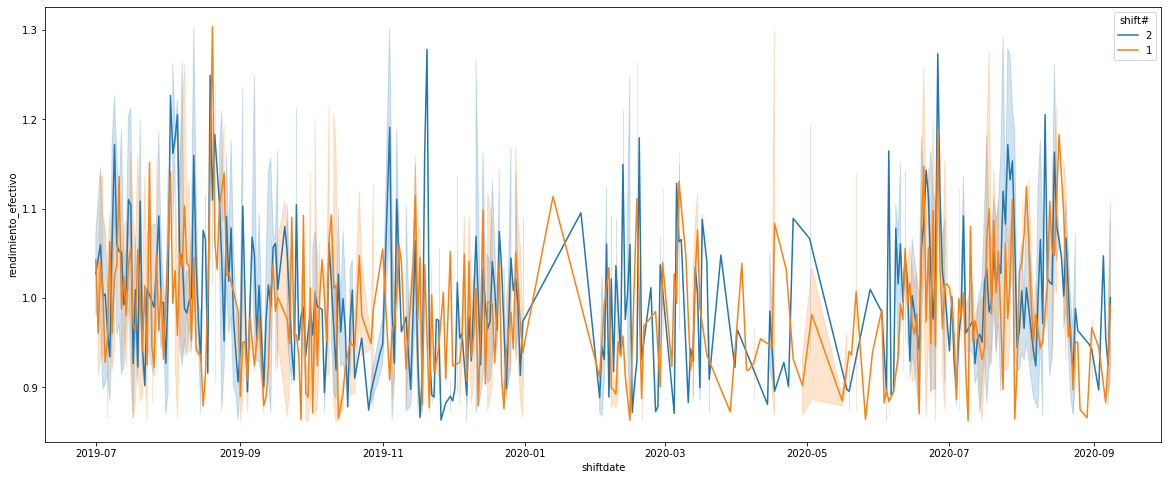

In [26]:
plt.figure(figsize=(20,8))

sns.lineplot(x="shiftdate", y="rendimiento_efectivo",
             hue="shift#",
             data=df_palas[(df_palas.rendimiento_efectivo < 1.306) & (df_palas.rend_ef_bin == 1)])

No Cumple

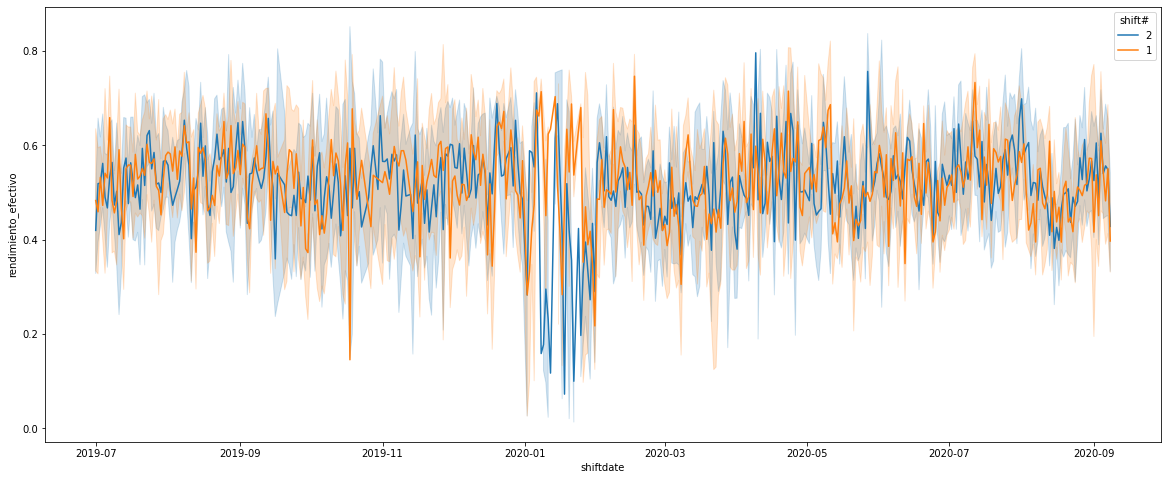

In [27]:
plt.figure(figsize=(20,8))

sns.lineplot(x="shiftdate", y="rendimiento_efectivo",
             hue="shift#",
             data=df_palas[(df_palas.rendimiento_efectivo < 1.306) & (df_palas.rend_ef_bin == 0)])

#Plot

In [61]:
import datetime as dt
df_palas['date'] = pd.to_datetime(df_palas['shiftdate'])
df_palas['date'] = df_palas['date'].map(dt.datetime.toordinal)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


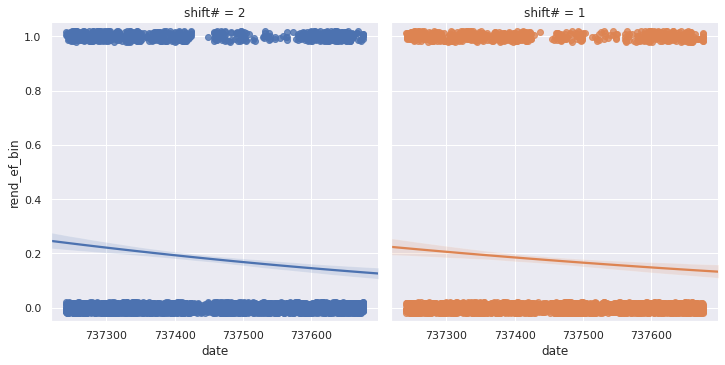

In [65]:
sns.set_theme(style="darkgrid")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x="date", y="rend_ef_bin", col="shift#", hue="shift#", data=df_palas,
               y_jitter=.02, logistic=True, truncate=False)
g.set(ylim=(-.05, 1.05))

#Tiempo Efectivo

In [54]:
df_palas[df_palas.tmcat01 < 9000].describe()

,start,logintime,totaltime,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo,rendimiento_operativo,rend_ef_bin,rend_op_bin
count,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.0,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000
mean,10085.919836,13867.447328,6437.644913,10.169579,2344.154419,2197.800874,1246.469681,593.456578,10.169579,6437.644913,4041.130781,0.0,564.455807,1149.482014,294.328880,353.940134,34.307297,0.747575,0.747575,0.153905,0.153905
std,21476.196433,13963.741866,5759.502836,7.859046,1820.901323,1512.802471,1083.802516,532.394854,7.859046,5759.502836,2446.080118,0.0,1108.850949,4166.155898,2057.200742,1382.077089,513.024093,3.655016,3.655016,0.360904,0.360904
min,-14400.000000,0.000000,4.000000,1.000000,44.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025552,0.025552,0.000000,0.000000
25%,-14400.000000,841.000000,2867.250000,4.000000,915.000000,935.750000,414.750000,174.000000,4.000000,2867.250000,1975.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.406787,0.406787,0.000000,0.000000
50%,28800.000000,8181.500000,5293.500000,8.000000,1914.500000,1956.500000,976.500000,461.500000,8.000000,5293.500000,3776.000000,0.0,174.000000,0.000000,0.000000,0.000000,0.000000,0.543911,0.543911,0.000000,0.000000
75%,28800.000000,26634.000000,8159.500000,14.000000,3330.500000,3252.000000,1798.250000,879.000000,14.000000,8159.500000,5969.000000,0.0,719.000000,0.000000,15.000000,0.000000,0.000000,0.738293,0.738293,0.000000,0.000000
max,72000.000000,42904.000000,43200.000000,46.000000,11039.000000,8432.000000,7227.000000,4188.000000,46.000000,43200.000000,8999.000000,0.0,27202.000000,40956.000000,42088.000000,21298.000000,23374.000000,199.736842,199.736842,1.000000,1.000000


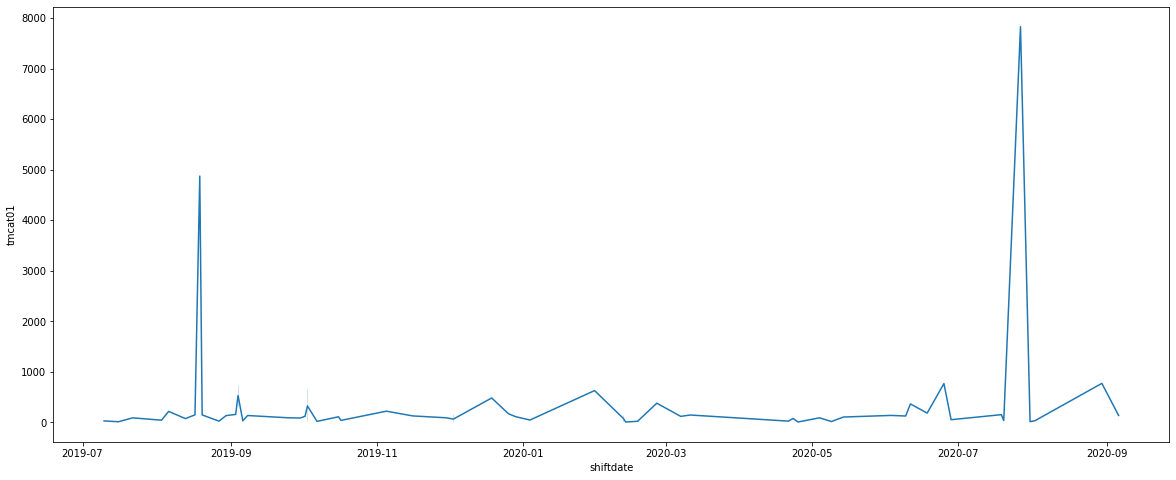

In [69]:
plt.figure(figsize=(20,8))

sns.lineplot(x="shiftdate", y="tmcat01",
             data=df_palas[(df_palas.rendimiento_efectivo > 1.4) & (df_palas.tmcat01 < 10000)])

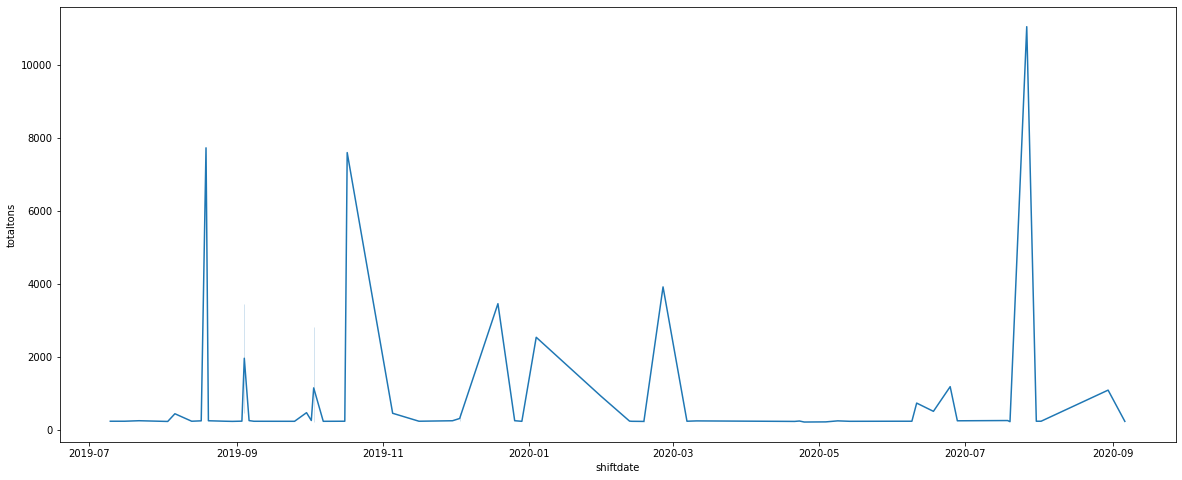

In [68]:
plt.figure(figsize=(20,8))

sns.lineplot(x="shiftdate", y="totaltons",
             data=df_palas[ (df_palas.rendimiento_efectivo > 1.4) & (df_palas.tmcat01 < 10000) ])

#Regresión logística

In [115]:
df_palas.columns

Index(['shiftdate', 'shift#', 'start', 'crew', 'eqmtid', 'logintime', 'locid',
       'operid', 'totaltime', 'pit', 'unit', 'totalloads', 'totaltons',
       'loadtime', 'idletime', 'spottime', 'loadcnt', 'tmcat00', 'tmcat01',
       'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07',
       'rendimiento_efectivo', 'rendimiento_operativo', 'rend_ef_bin',
       'rend_op_bin'],
      dtype='object')

In [142]:
list_drop = ['start',
             'unit',
             'pit',
             'rendimiento_operativo',
             'rendimiento_efectivo',
             'totaltons',
             'totalloads',
             'loadcnt',
             'tmcat00',
             'tmcat01',
             'rend_op_bin']
train = df_palas.drop(list_drop,axis=1)

In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8023 entries, 45 to 120389
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   shiftdate    8023 non-null   datetime64[ns]
 1   shift#       8023 non-null   object        
 2   crew         8023 non-null   object        
 3   eqmtid       8023 non-null   object        
 4   logintime    8023 non-null   int64         
 5   locid        8023 non-null   object        
 6   operid       8023 non-null   object        
 7   totaltime    8023 non-null   int64         
 8   loadtime     8023 non-null   int64         
 9   idletime     8023 non-null   int64         
 10  spottime     8023 non-null   int64         
 11  tmcat02      8023 non-null   int64         
 12  tmcat03      8023 non-null   int64         
 13  tmcat04      8023 non-null   int64         
 14  tmcat05      8023 non-null   int64         
 15  tmcat06      8023 non-null   int64         
 16  tmc

Turno (objet) a dummies

In [144]:
turno = pd.get_dummies(train['shift#'])

Crew (objet) a dummies

In [145]:
crew = pd.get_dummies(train['crew'])

eqmtid (objet) a int

In [146]:
eqmtid = pd.get_dummies(train['eqmtid'])

shiftdate (datetime) a date (int)

In [147]:
import datetime as dt
train['date'] = pd.to_datetime(train['shiftdate'])
train['date'] = train['date'].map(dt.datetime.toordinal)

In [148]:
train = pd.concat([train.drop(['shift#','shiftdate','crew','eqmtid','locid','operid'],axis=1),turno,crew,eqmtid],axis=1)

In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8023 entries, 45 to 120389
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   logintime    8023 non-null   int64
 1   totaltime    8023 non-null   int64
 2   loadtime     8023 non-null   int64
 3   idletime     8023 non-null   int64
 4   spottime     8023 non-null   int64
 5   tmcat02      8023 non-null   int64
 6   tmcat03      8023 non-null   int64
 7   tmcat04      8023 non-null   int64
 8   tmcat05      8023 non-null   int64
 9   tmcat06      8023 non-null   int64
 10  tmcat07      8023 non-null   int64
 11  rend_ef_bin  8023 non-null   int64
 12  date         8023 non-null   int64
 13  1            8023 non-null   uint8
 14  2            8023 non-null   uint8
 15  G1           8023 non-null   uint8
 16  G2           8023 non-null   uint8
 17  G3           8023 non-null   uint8
 18  G4           8023 non-null   uint8
 19  026          8023 non-null   uint8
 20  029  

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('rend_ef_bin',axis=1),
                                                    train['rend_ef_bin'],
                                                    test_size=0.30,random_state=42)

In [184]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:
y_pred = model.predict(X_test)

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1959
           1       0.67      0.16      0.26       448

    accuracy                           0.83      2407
   macro avg       0.75      0.57      0.58      2407
weighted avg       0.80      0.83      0.78      2407



In [156]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)

In [158]:
cf_matrix

array([[1923,   36],
       [ 376,   72]])

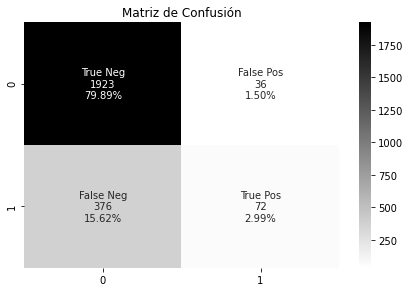

In [179]:
import numpy as np

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

class_names = [0,1]
# settings plot
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Clasificador')
# plot
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='binary')